# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# Load dataset
Let's load the iris flower dataset using scikit-learn's built-in dataset


In [2]:
from sklearn import datasets
data= datasets.load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
data['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
data[ 'target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
data["DESCR"]

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

# Problem Description

We are trying to use attributes of flowers to predict the species of a flower. Specifically, we are going to analyze the 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)' to predict which  type of iris flower is it among the 3 types 'setosa', 'versicolor', 'virginica'.

### This is a multiclass classification problem.



<center><h1> Exploratory Data Analysis (EDA) </h1></center>

## Create a pandas DataFrame from the data
We could do our full analysis using NumPy and NumPy arrays, but we’ll create a pandas DataFrame because it does make some things simpler, and also to get some practice using pandas.

In [8]:
df = pd.DataFrame(data["data"],columns=data["feature_names"])
df["target"]= data['target']
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Basic Descriptive Statistics

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Distributions of features and targets

### Draw histogram for sepal length and understand histograms

The bins parameter in a histogram controls how the data is grouped into intervals along the x-axis.Suppose the range of sepal lengths is from 4 to 8:

With bins=4, the bins might be:

4.0–5.0

5.0–6.0

6.0–7.0

7.0–8.0

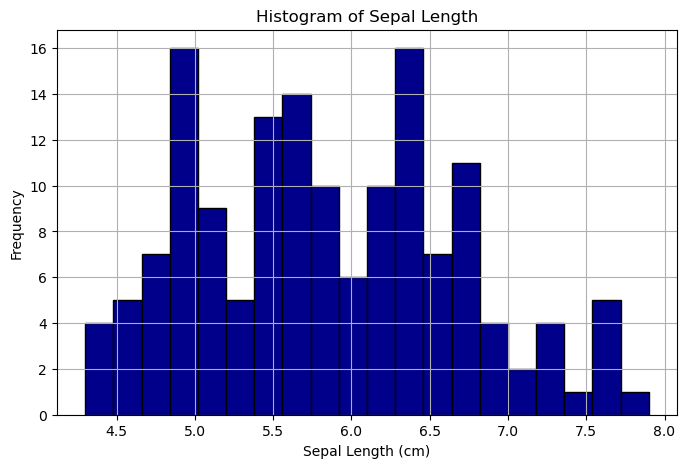

In [10]:
# Draw histogram for sepal length
plt.figure(figsize=(8, 5))
plt.hist(df["sepal length (cm)"], bins=20, color='darkblue', edgecolor='black') 
plt.title("Histogram of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### 🛠 To see the exact bin ranges, use this code:

In [11]:
counts, bin_edges = np.histogram(df["sepal length (cm)"], bins=20)
print("Bin edges:", bin_edges)
print("Counts per bin:", counts)

Bin edges: [4.3  4.48 4.66 4.84 5.02 5.2  5.38 5.56 5.74 5.92 6.1  6.28 6.46 6.64
 6.82 7.   7.18 7.36 7.54 7.72 7.9 ]
Counts per bin: [ 4  5  7 16  9  5 13 14 10  6 10 16  7 11  4  2  4  1  5  1]


The highest frequency is 16, which occurs in two bins: 4.84–5.02 cm and 6.28–6.46 cm. This means most sepal lengths in the dataset are concentrated around 5 cm and 6.4 cm, indicating two common sepal length ranges among the iris flowers.

## Draw histogram for each feature 

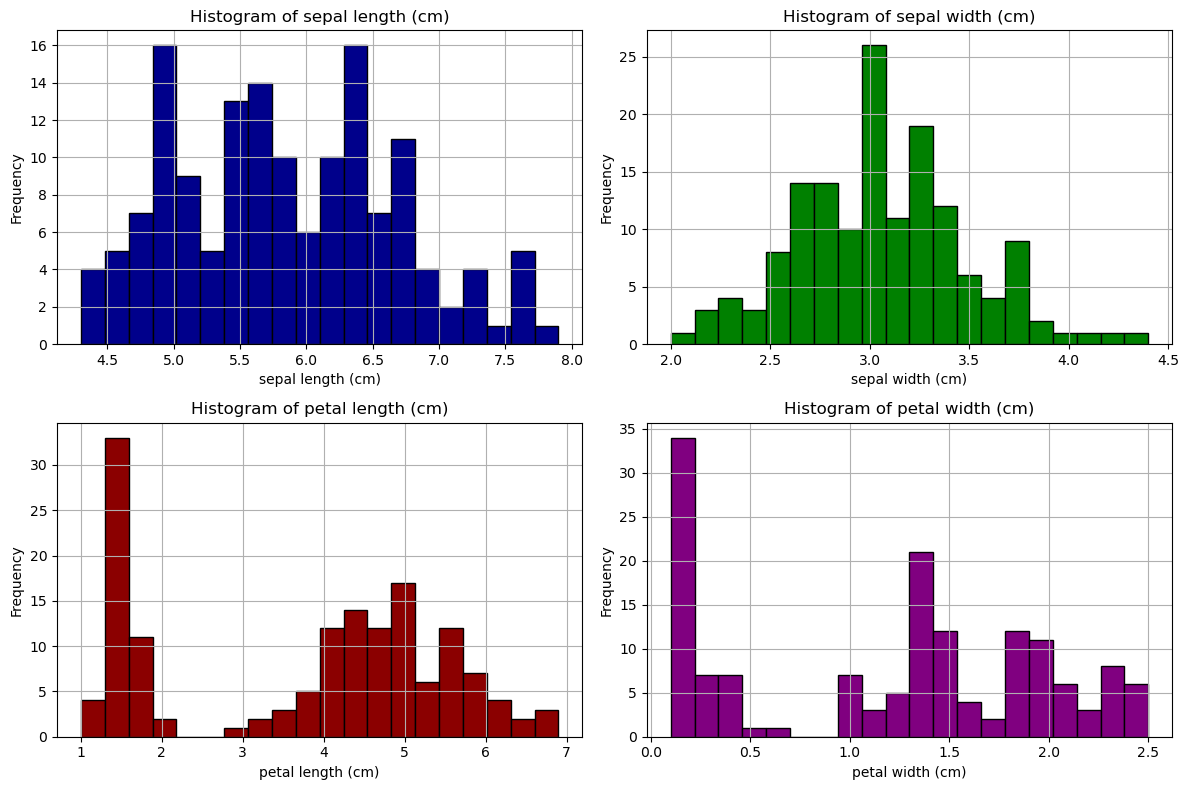

In [12]:
features = [
    "sepal length (cm)",
    "sepal width (cm)",
    "petal length (cm)",
    "petal width (cm)"
]

colors = ['darkblue', 'green', 'darkred', 'purple']

# Create subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins=20, color=colors[i], edgecolor='black')
    axes[i].set_title(f"Histogram of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


## Relationship between the data features with the target

In [13]:
# Map numeric target to class names
df["target_name"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})
# Show the updated DataFrame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


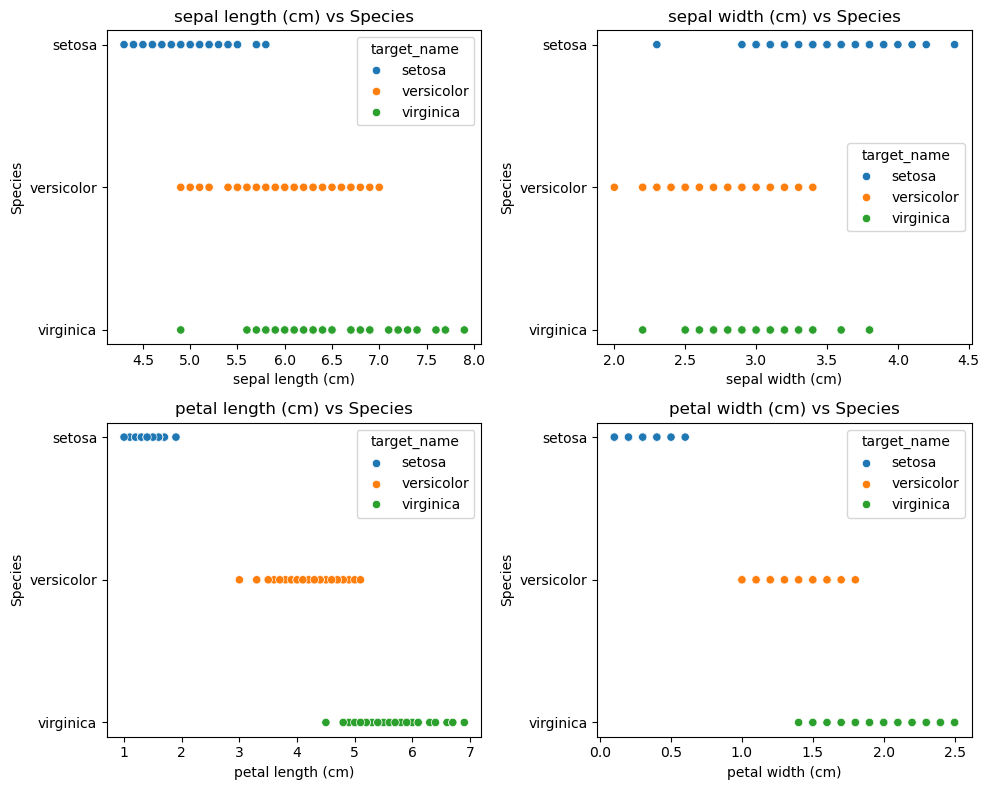

In [14]:
features = [
    "sepal length (cm)",
    "sepal width (cm)",
    "petal length (cm)",
    "petal width (cm)"
]

# Set up subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(
        data=df,
        x=feature,
        y="target_name",  # target on y-axis
        hue="target_name",
        ax=axes[i]
    )
    axes[i].set_title(f"{feature} vs Species")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Species")

plt.tight_layout()
plt.show()


## Pairplot for EDA

The sns.pairplot(df) function from Seaborn creates a grid of scatter plots that shows pairwise relationships between all numerical features in the dataset. It also includes histograms or KDE plots on the diagonal to show the distribution of each individual feature.

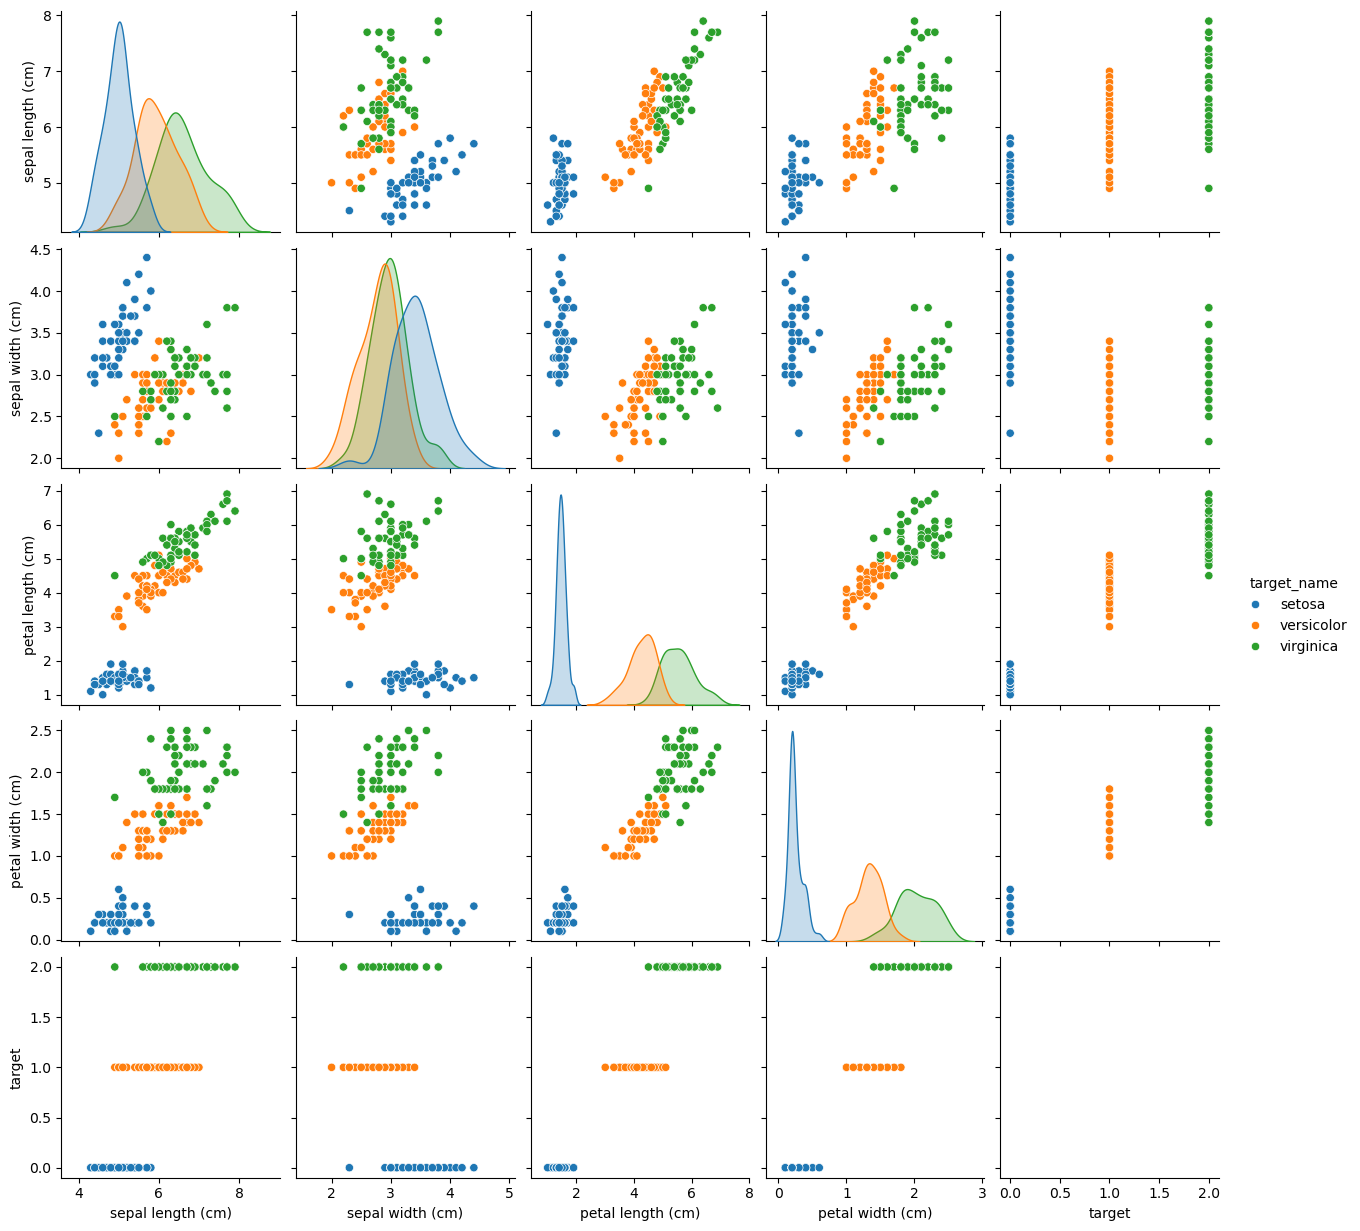

In [15]:
sns.pairplot(df, hue="target_name")
plt.show()

From the pair plot, we can observe that:

1. Setosa is clearly separable from the other two species across multiple feature combinations, making it the easiest to identify.

2. Versicolor and Virginica show some overlap, especially in sepal-related features, which might make them slightly harder to distinguish from each other.

<center><h1>Data Preprocessing</h1></center> 

In [16]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(1)

In [18]:
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
142,5.8,2.7,5.1,1.9,2,virginica


In [19]:
df = df.drop_duplicates()


In [20]:
df.shape

(149, 6)

<center><h1> Data splitting </h1></center>

🔍 **Explanation:**

- `X` = all feature columns (excluding target).
- `y` = target column.
- `test_size=0.2` = 20% of the data will be used for testing.
- `random_state=42` = ensures reproducibility (same results every time you run the code).
- `stratify=y` = ensures class distribution is similar in both train and test sets.

train_test_split also suffles the data by default


Without axis=1, you'd get an error:
Because by default, drop() assumes you're dropping rows (i.e., axis=0), and it would look for a row named "target", not a column.




In [21]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(["target", "target_name"], axis=1)
y = df["target"]

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Modeling - What is our baseline?

**What is the simplest model we can think of?**

In this case, if our baseline model is just randomly guessing the species of flower, or guessing a single species for every data point, we would expect to have a model accuracy of **0.33 or 33%**, since we have 3 different classes that are evenly balanced.

So our models should at least beat **33% accuracy**.


## Modeling - Simple manual model

Let's manually look at our data and decide some cutoff points for classification. from the pairplot above and try to understand the range of just one feature just to understand.

In [22]:
def single_feature_prediction(petal_length):
    """Predict the iris species given the petal length."""
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2

In [23]:
X_train_array = X_train.to_numpy()
manual_y_predictions = np.array([single_feature_prediction(val) for val in X_train_array[:, 2]])
accuracy = np.mean(manual_y_predictions == y_train)
print(f"Manual model accuracy: {accuracy:.2f}")

Manual model accuracy: 0.95


## Modeling - Logistic Regression
<table>
<tr>
<td width="60%">

**Logistic Regression** is a popular classification algorithm used to predict the probability of categorical outcomes. It models the relationship between one or more features and the probability that a given input belongs to a particular class. Unlike linear regression which predicts continuous values, logistic regression outputs probabilities between 0 and 1 using the logistic (sigmoid) function.

When visualized on a graph with two features, logistic regression tries to find the best decision boundary (a line or curve) that separates the classes. Data points on one side of the boundary are predicted as one class, and points on the other side belong to another class. This makes logistic regression especially useful for binary and multi-class classification problems where classes are linearly separable or nearly so.

</td>
<td width="40%">

![Logistic Regression Example](logistic_regression.jpg)

</td>
</tr>
</table>


### Train/Test Split Evaluation

You split your data into training and test sets, train on the training data, then evaluate on the test data to check performance.

---

### Validation 

Validation means using part of the training data (like via cross-validation) to tune hyperparameters or select models **before** testing on the final test set. It helps avoid overfitting and gives a more reliable estimate of model performance.


In [24]:
# Split original training data into training and validation sets
X_t, X_validation, y_t, y_validation = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression(max_iter=200)
# Train the model on training data
log_reg.fit(X_t, y_t)

LogisticRegression(max_iter=200)

In [26]:
y_pred = log_reg.predict(X_validation)

In [27]:
y_pred == y_validation

115     True
89      True
146     True
52      True
24      True
126    False
46      True
121     True
40      True
87      True
79      True
81      True
0       True
139     True
73      True
114     True
23      True
19      True
133     True
124     True
50      True
12      True
17      True
83     False
Name: target, dtype: bool

## Why Use Validation?

validation is important because the accuracy on the training set `(X_train, y_train)` is often higher than on unseen data. This happens because the model might be **memorizing** the training data rather than **understanding the underlying patterns**.

By using a validation set or cross-validation, we can better estimate how the model will perform on new, unseen data and detect when the model is **overfitting** — performing better on training data but poorer on validation or test data.


In [28]:
np.mean(y_pred == y_validation)

np.float64(0.9166666666666666)

In [29]:
log_reg.score(X_train, y_train)

0.9663865546218487

## What is Cross-Validation?
<table>
<tr>
<td width="60%">

Cross-validation is a technique used to evaluate the performance of a machine learning model. 

Instead of using a single train-test split, the training data is divided into multiple subsets (or "folds"). The model is trained on some folds and validated on the remaining fold. This process is repeated several times, with each fold being used as the validation set once.

The average performance across all folds gives a more reliable estimate of how the model will perform on unseen data.
</td>
<td width="40%">

![Logistic Regression Example](cross_validation.png)

</td>
</tr>
</table>


## Using cross validation to evaluate our model 

In [30]:
from sklearn.model_selection import cross_val_score, cross_val_predict
model= LogisticRegression(max_iter=200)

In [31]:
accuracies= cross_val_score(model,X_train, y_train,cv= 5, scoring="accuracy")
np.mean(accuracies)

np.float64(0.9583333333333334)

## Where are we misclassifying our points?

In [32]:
y_pred = cross_val_predict(model,X_train, y_train,cv= 5)

In [33]:
y_pred.shape

(119,)

In [34]:
y_train.shape

(119,)

In [35]:
predicted_correctly_mask = y_pred == y_train
predicted_correctly_mask

6      True
128    True
95     True
44     True
30     True
       ... 
52     True
47     True
102    True
124    True
16     True
Name: target, Length: 119, dtype: bool

In [36]:
not_predicted_correctly= ~predicted_correctly_mask
not_predicted_correctly

6      False
128    False
95     False
44     False
30     False
       ...  
52     False
47     False
102    False
124    False
16     False
Name: target, Length: 119, dtype: bool

In [37]:
X_train[not_predicted_correctly] # for both x and y the index is same

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
133,6.3,2.8,5.1,1.5
70,5.9,3.2,4.8,1.8
119,6.0,2.2,5.0,1.5
106,4.9,2.5,4.5,1.7
83,6.0,2.7,5.1,1.6


# Plot the values where the points are misclassified

In [38]:
df_predictions = pd.concat([X_train, y_train], axis=1)
df_predictions["target_name"] = df_predictions ["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
6,4.6,3.4,1.4,0.3,0,setosa
128,6.4,2.8,5.6,2.1,2,virginica
95,5.7,3.0,4.2,1.2,1,versicolor
44,5.1,3.8,1.9,0.4,0,setosa
30,4.8,3.1,1.6,0.2,0,setosa


In [39]:
df_predictions["correct_predictions"] =  predicted_correctly_mask
df_predictions["prediction"] = y_pred
df_predictions["prediction_label"] = df_predictions["prediction"].map({0: "setosa", 1: "versicolor", 2: "virginica"})
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_predictions,prediction,prediction_label
6,4.6,3.4,1.4,0.3,0,setosa,True,0,setosa
128,6.4,2.8,5.6,2.1,2,virginica,True,2,virginica
95,5.7,3.0,4.2,1.2,1,versicolor,True,1,versicolor
44,5.1,3.8,1.9,0.4,0,setosa,True,0,setosa
30,4.8,3.1,1.6,0.2,0,setosa,True,0,setosa


## This is the predicted plot

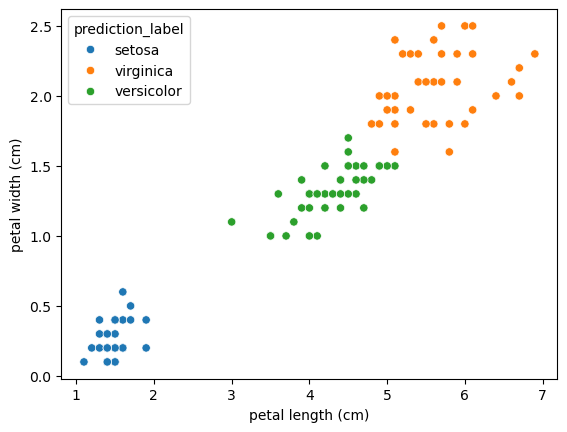

In [40]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue= "prediction_label", data=df_predictions )
plt.show()

## This is the actual plot

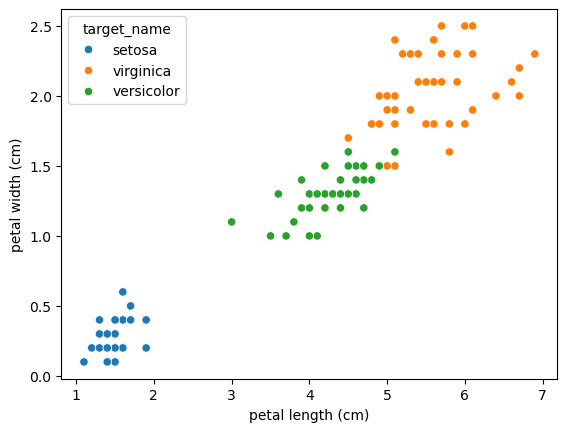

In [41]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue= "target_name", data=df_predictions )
plt.show()

## This is the actual and predicted plot

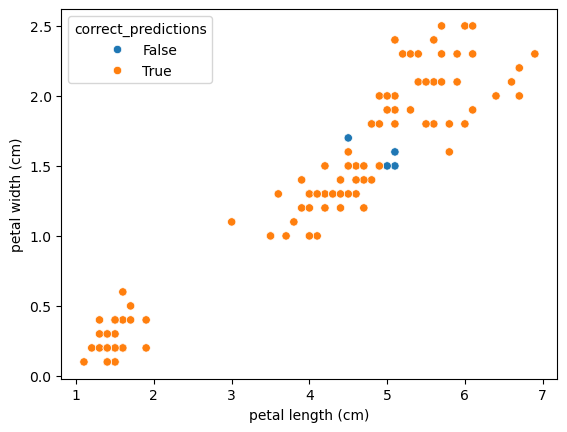

In [42]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue= "correct_predictions", data=df_predictions )
plt.show()

# Filter misclassified samples

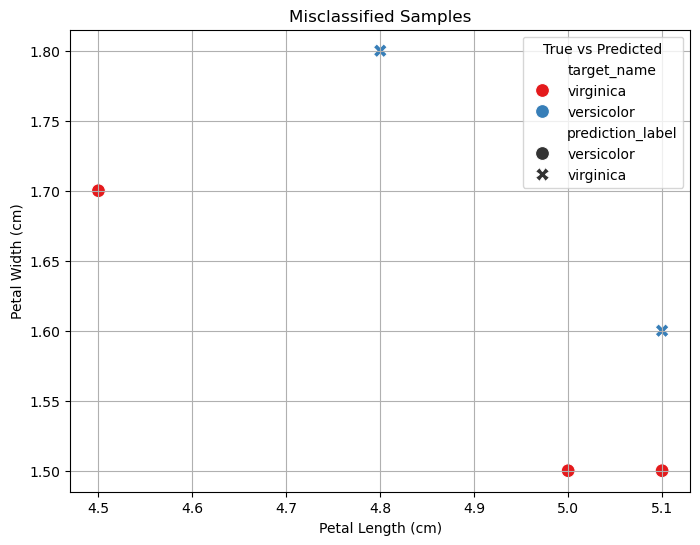

In [43]:
# Filter misclassified samples
misclassified_df = df_predictions[df_predictions['correct_predictions'] == False]

# Plot using seaborn - you can change the x and y features as needed
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=misclassified_df,
    x='petal length (cm)', 
    y='petal width (cm)', 
    hue='target_name',
    style='prediction_label',
    s=100,
    palette='Set1'
)
plt.title('Misclassified Samples')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='True vs Predicted')
plt.grid(True)
plt.show()

<center><h1>Model Tuning</h1></center>
Model tuning is the experimental process of finding the optimal values of hyperparameters to maximize model performance. Hyperparameters are the set of variables whose values cannot be estimated by the model from the training data. These values control the training process. Model tuning is also known as hyperparameter optimization.

<br><br>
Note: one important parameter is regularizarion which controls how flexible the model can be when fitting the training data. A low level of regularization allows the model to fit the data very closely, which can lead to overfitting.
In scikit-learn, this is controlled by the `c` parameter (inverse of regularization strength):

Smaller `c` = stronger regularization (simpler models -> we dont want it to accidentally memorize/overfitting)

Larger `c` = weaker regularization (more flexible model)

### By changing the val of `c`

In [44]:
for reg_param in (0.1, 0.3, 0.9, 1, 1.3, 1.9, 2, 2.5, 2.9, 3, 3.5, 4, 5,6,7,8,9,10):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f'Accuracy: {np.mean(accuracy) * 100:.2f}%')

0.1
Accuracy: 93.30%
0.3
Accuracy: 94.17%
0.9
Accuracy: 95.83%
1
Accuracy: 95.83%
1.3
Accuracy: 95.83%
1.9
Accuracy: 95.83%
2
Accuracy: 95.83%
2.5
Accuracy: 95.83%
2.9
Accuracy: 95.83%
3
Accuracy: 95.83%
3.5
Accuracy: 95.83%
4
Accuracy: 95.83%
5
Accuracy: 95.83%
6
Accuracy: 95.83%
7
Accuracy: 95.83%
8
Accuracy: 95.83%
9
Accuracy: 95.83%
10
Accuracy: 95.83%


## Final Model

In [45]:
model = LogisticRegression(max_iter=200, C=1)

## How well does our model do on test dataset which is completely unseen at this point

## Train our moel on the full test data

In [46]:
model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200)

In [47]:
y_test_pred= model.predict(X_test)

In [48]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

print(f'Test set accuracy: {test_set_accuracy * 100:.5f}%')

Test set accuracy: 96.66667%


### Datapoints misclassified

In [49]:
df_predictions_test = pd.concat([X_test, y_test], axis=1)
df_predictions_test["target_name"] = df_predictions_test["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
69,5.6,2.5,3.9,1.1,1,versicolor
66,5.6,3.0,4.5,1.5,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa
147,6.5,3.0,5.2,2.0,2,virginica


In [50]:
df_predictions_test.shape

(30, 6)

In [51]:
df_predictions_test["correct_predictions"] =  test_set_correctly_classified
df_predictions_test["prediction"] = y_test_pred
df_predictions_test["prediction_label"] = df_predictions_test["prediction"].map({0: "setosa", 1: "versicolor", 2: "virginica"})
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_predictions,prediction,prediction_label
6,4.6,3.4,1.4,0.3,0,setosa,True,0,setosa
128,6.4,2.8,5.6,2.1,2,virginica,True,2,virginica
95,5.7,3.0,4.2,1.2,1,versicolor,True,1,versicolor
44,5.1,3.8,1.9,0.4,0,setosa,True,0,setosa
30,4.8,3.1,1.6,0.2,0,setosa,True,0,setosa


## This is the predicted plot

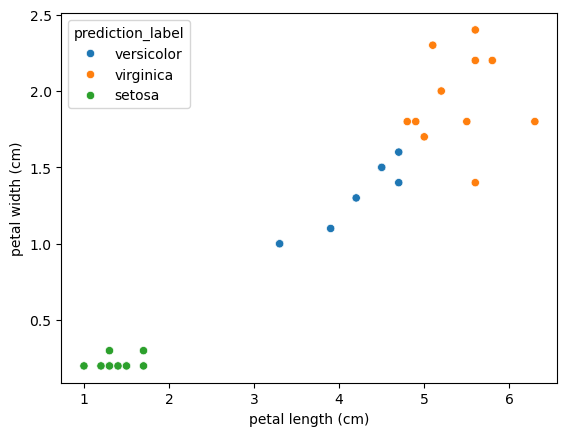

In [52]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue= "prediction_label", data=df_predictions_test )
plt.show()

## This is the actual plot

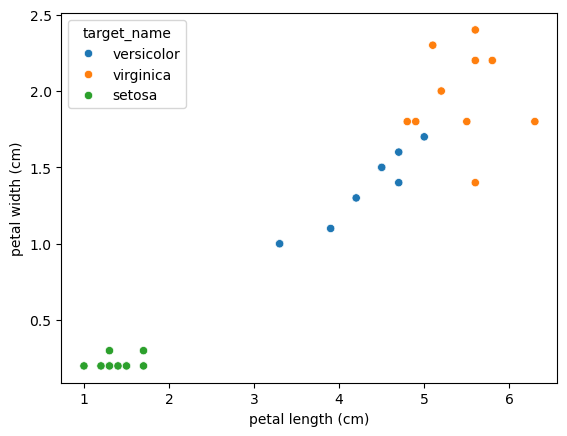

In [53]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue= "target_name", data=df_predictions_test )
plt.show()

## This is the actual and predicted plot


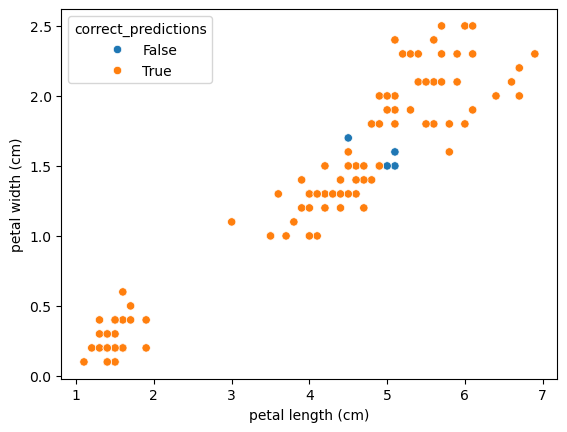

In [54]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue= "correct_predictions", data=df_predictions )
plt.show()

# In Conclusion 
in clonclusion our model the best accuracy with max_iteration=200 and c=1